In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
hr_data = pd.read_csv(r'C:\Users\ASHOK\Downloads\HR Data.csv')
print("First few rows of the DataFrame:")
hr_data.head(10)

First few rows of the DataFrame:


,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8
5,E06,13.835646,Outstanding,7
6,E07,13.673691,Outstanding,7
7,E08,8.031467,Unsatisfactory,6
8,E09,9.304839,Excellent,7
9,E10,13.429567,Excellent,6


In [2]:
# How many observations are there in the dataset?
num_observations = hr_data.shape[0]
print(f'There are {num_observations} observations.')

There are 500 observations.


In [3]:
# How many variables have missing values?
# How many missing values are present within the Hrs variable?
print("Missing values count in each column:")
print(hr_data.isnull().sum())
print()
print('Missing values percentage in each column with:')
print(hr_data.isnull().sum() *100/hr_data.shape[0])

Missing values count in each column:
EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64

Missing values percentage in each column with:
EmployeeId              0.0
Hrs                     1.6
Rating                  0.0
EmployeeSatisfaction    0.0
dtype: float64


In [4]:
# What is the average value for the Hrs variable? Round it off to 2 decimal places.
average_Hrs = hr_data['Hrs'].mean()
print('The average value for the Hrs variable is:',round(average_Hrs, 2))

The average value for the Hrs variable is: 11.31


In [5]:
# What is the cardinality of the Rating variable in the dataset?
cardinality = hr_data['Rating'].nunique()
print('The cardinality of the Rating variable in the dataset is:',cardinality)

The cardinality of the Rating variable in the dataset is: 6


# Data Cleaning:

In [6]:
# Standardise the Rating column: Make the column consistent so that it has cardinality of 4.
# [Hint: Use Unsatisfactory in place of Un satisfactory and Satisfactory in place of satisfactory]
hr_data['Rating'] = hr_data['Rating'].replace({'Un satisfactory' : 'Unsatisfactory', 'satisfactory' : 'Satisfactory'})
cardinality_after = hr_data['Rating'].unique()
print('Cardinality after standardise:',cardinality_after)

Cardinality after standardise: ['Excellent' 'Outstanding' 'Unsatisfactory' 'Satisfactory']


In [7]:
# Remove any empty or incomplete rows: Check if there are any rows with missing data. Substitute these values with the mean of numerical or mode for non-numerical data.
# [Challenge yourself: Try to fill mean/mode value corresponding to individual individual ratings]
hr_data['Hrs'].fillna(hr_data['Hrs'].mean(), inplace=True)
print(hr_data.isnull().sum())

EmployeeId              0
Hrs                     0
Rating                  0
EmployeeSatisfaction    0
dtype: int64


In [8]:
# Calculate the mode of the employee performance in the rating column. Choose the correct option.
mode_availability = hr_data['Rating'].mode()[0]
print('Mode of the employee performance in the rating column is:',mode_availability)

Mode of the employee performance in the rating column is: Excellent


In [9]:
# Calculate the range of hours the employee is working for in case of unsatisfactory rating.
unsatisfactory_data = hr_data[hr_data['Rating'] == 'Unsatisfactory']
unsatisfactory_min = unsatisfactory_data['Hrs'].min()
unsatisfactory_max = unsatisfactory_data['Hrs'].max()
print(f'Range of hours the employee is working for in case of unsatisfactory rating: Min {unsatisfactory_min}, Max {unsatisfactory_max}')

Range of hours the employee is working for in case of unsatisfactory rating: Min 0.091720323, Max 8.489765491


Purpose: What do we achieve by calculating these stats?

These stats help us in understanding the different rating factors closely. We are able to understand that satisfactory and unsatisfactory performances have quite a say in their ratings. Lower ratings are given to employees who are working for lesser hours.

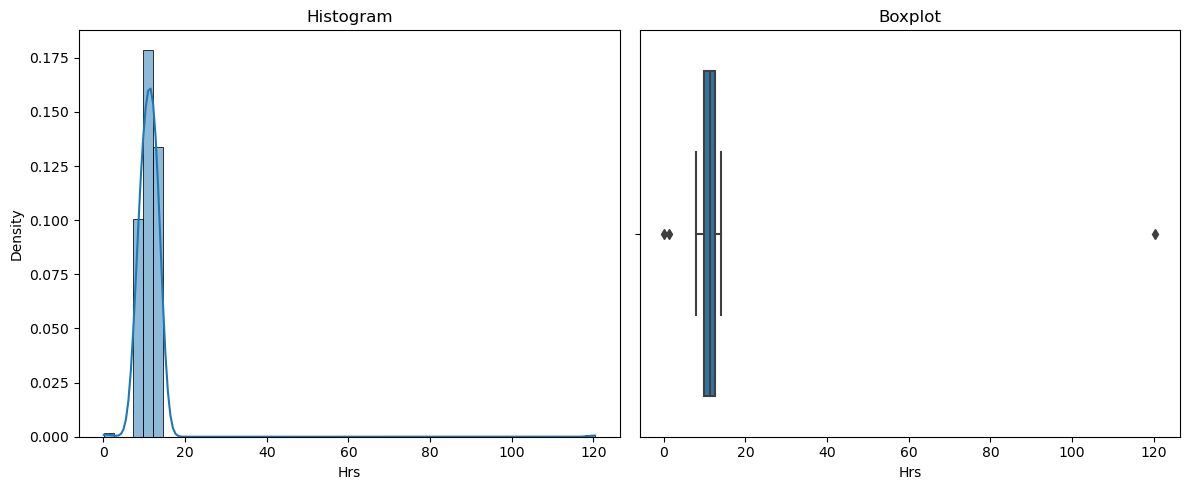

In [10]:
# Check out the distribution of the Hrs variable using histogram and boxplot. Where do we have the outliers?
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(hr_data['Hrs'], bins=50, kde=True, stat='density', ax=axes[0])
axes[0].set_xlabel("Hrs")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram")
sns.boxplot(x = hr_data['Hrs'], data = hr_data, ax=axes[1]).set(title = 'Boxplot')
plt.tight_layout()
plt.show()

Purpose: What do we achieve by analysing these distribution charts? If you closely take a look in these distribution charts, you can clearly see that the majority of the Hours are centred around 8 to 14 which clearly indicates the outliers towards the higher and lower side..

A histogram will give you a peek into how your distribution looks like. You can define the number of peaks which means it can be a unimodal, bimodal or multimodal distribution depending on the peaks involved.

A box plot on the other hand helps you understand min, max and interquartile range where most of the data is centred around.

With these 2 charts, you can easily understand the extremes involved in the data. Do understand that extremes/outliers require some thoughtful investigation before we actually take the decision of removing/retaining them.

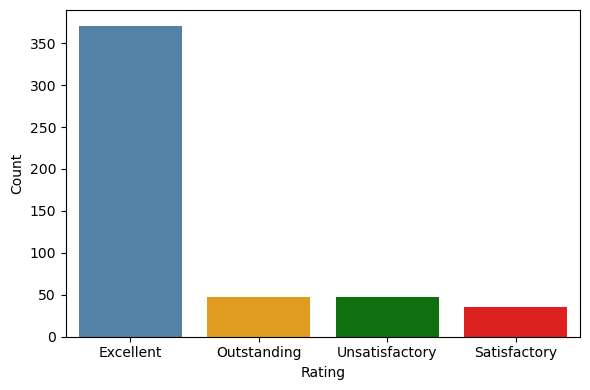

In [11]:
# Choose the correct frequency plot for Rating.
'Excellent' 'Outstanding' 'Unsatisfactory' 'Satisfactory'
rating_colors = {'Excellent': 'steelblue', 'Outstanding': 'orange', 'Unsatisfactory': 'green', 'Satisfactory': 'red'}
plt.figure(figsize = (6,4))
sns.countplot(data = hr_data, x = 'Rating', palette = rating_colors)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Purpose: We can clearly see that the highest frequency is for Excellent rating followed by outstanding and unsatisfactory. Also, we can see that the majority of employees are giving 6 or 7 satisfaction scores which means that the majority of employees aren’t that happy due to lower work life balance. Therefore, our major focus should be towards increasing the work life balance of the employees rather than rewarding the higher number of work hours from the employees.

Challenge Yourself! Try to calculate the average number of hours an employee is dedicating with respect to their satisfaction score and see if you can confirm the work life balance theory by this analysis.

This is what we call Univariate and biVariate Analysis which is a part of EDA.

Kudos for your bravery! One of the very important traits of the data scientist is the ability to find information autonomously. In this course we’ll try to focus on the most fundamental and essential formulas and tools - however, in your real work you will do this several times in a day. So one of our goals is to develop self-learning skills that will be super useful both in your studies and in your work life.

In [12]:
# Choose the correct frequencies for Employee Satisfaction Score.
count_of_EmployeeSatisfaction = hr_data.groupby('EmployeeSatisfaction')['EmployeeSatisfaction'].count()
total_count = pd.DataFrame({'EmployeeSatisfaction': count_of_EmployeeSatisfaction.index, 'Total Count' : count_of_EmployeeSatisfaction.values})
print('\nFrequencies for Employee Satisfaction Score is:')
print(total_count)


Frequencies for Employee Satisfaction Score is:
   EmployeeSatisfaction  Total Count
0                     6          142
1                     7          161
2                     8          132
3                     9           65


In [13]:
# Which rating has the highest number of average working hours?
avg_of_hours = hr_data.groupby('Rating')['Hrs'].mean()
highest_avg_rating = avg_of_hours.idxmax()
highest_rating = avg_of_hours.max()
print('The highest number of average working hours is:')
print(highest_avg_rating,'-', highest_rating)

The highest number of average working hours is:
Outstanding - 13.739969521914894


In [14]:
# Identify the correct upper and lower cut off within Hrs using IQR rule to exclude the outliers. Round off to 2 decimal places.
Q1 = hr_data['Hrs'].quantile(0.25) # Calculate the first quartile (Q1)

Q3 = hr_data['Hrs'].quantile(0.75) # Calculate the third quartile (Q3)

IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)

upper_cutoff = Q3 + 1.5 * IQR # Calculate the upper cutoff

lower_cutoff = Q1 - 1.5 * IQR # Calculate the lower cutoff

print("Upper cutoff (excluding outliers):", round(upper_cutoff, 2))
print("Lower cutoff (excluding outliers):", round(lower_cutoff, 2))

Upper cutoff (excluding outliers): 16.89
Lower cutoff (excluding outliers): 5.48


In [15]:
# After treatment with the outliers, what’s the mean value for Hrs variable?
data_no_outliers = hr_data[(hr_data['Hrs'] >= lower_cutoff) & (hr_data['Hrs'] <= upper_cutoff)]

mean_hrs_no_outliers = data_no_outliers['Hrs'].mean() # Calculate the mean value for the Hrs variable after excluding outliers

print("Mean value for Hrs variable after excluding outliers:", round(mean_hrs_no_outliers, 2))

Mean value for Hrs variable after excluding outliers: 11.13


In [16]:
# After treatment of outliers, which rating isn’t witnessing changes with respect to Hrs variable?
# Calculate the mean hours worked for each rating before and after outlier treatment
mean_hrs_before_outliers = hr_data.groupby('Rating')['Hrs'].mean()
mean_hrs_after_outliers = data_no_outliers.groupby('Rating')['Hrs'].mean()

# Find ratings that aren't witnessing changes with respect to the Hrs variable
ratings_no_changes = mean_hrs_before_outliers[mean_hrs_before_outliers == mean_hrs_after_outliers].index.tolist()

print("Ratings that aren't witnessing changes with respect to the Hrs variable after outlier treatment:", ratings_no_changes)

Ratings that aren't witnessing changes with respect to the Hrs variable after outlier treatment: ['Outstanding', 'Satisfactory']


Purpose: Identifying the cut off values in order to deal with outliers are a great way to restrict the data. Now, it depends on the domain/context of the problem that we want to restrict the data to these cut off values or not.

Do understand that these congestion rates are part of a realistic scenario and not because of some error in the data. Therefore, it's better to continue with the analysis as such.

In [17]:
# Let’s first try to understand the Rating variable. Please identify the probabilities for each rating within the dataset. [Hint: Use value_counts]
rating_probabilities = hr_data['Rating'].value_counts(normalize=True)*100
print("Probabilities for each rating within the dataset:")
print(rating_probabilities)

Probabilities for each rating within the dataset:
Rating
Excellent         74.2
Outstanding        9.4
Unsatisfactory     9.4
Satisfactory       7.0
Name: proportion, dtype: float64


In [18]:
# Now considering the probabilities calculated in previous questions, Please calculate the probability that 2 out of a sample of 10 employees are rated as outstanding.
# Round it off to 2 decimal places. [Hint: Use binomial distribution]
from scipy.stats import binom
probability_outstanding = hr_data['Rating'].value_counts(normalize=True)['Outstanding']
n = 10
k = 2
probability_2_outstanding = binom.pmf(k, n, probability_outstanding)
print("Probability that 2 out of a sample of 10 employees are rated as outstanding:", round(probability_2_outstanding, 2))

Probability that 2 out of a sample of 10 employees are rated as outstanding: 0.18


In [19]:
# Please calculate the probability that at least 3 out of a sample of 10 employees are rated as outstanding. Round it off to 2 decimal places.
probability_outstanding = hr_data['Rating'].value_counts(normalize=True)['Outstanding']
n = 10
k = 2
probability_2_outstanding = 1 - binom.cdf(k, n, probability_outstanding)
print("Probability that at least 3 out of a sample of 10 employees are rated as outstanding:", round(probability_2_outstanding, 2))

Probability that at least 3 out of a sample of 10 employees are rated as outstanding: 0.06


In [20]:
# Please calculate the probability that exactly 7 out of a sample of 10 employees are rated as outstanding or Excellent. Round it off to 2 decimal places.
# [Hint: Add up the probability of both the ratings]
probability = hr_data['Rating'].value_counts(normalize=True)[['Outstanding', 'Excellent']].sum()
n = 10
k = 7
probability2 = round(binom.pmf(k, n, probability), 2)

print("Probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent:", probability2)

Probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent: 0.15


In [21]:
# Please calculate the probability that None of the 10 trainees are rated as Unsatisfactory. Round it off to 2 decimal places.
# First Method -
probability_satisfactory_or_better = 1 - hr_data['Rating'].value_counts(normalize=True).get('Unsatisfactory')
# Define the parameters for the binomial distribution
n = 10  # Number of trials (number of trainees)
k = 10  # Number of successes (no unsatisfactory ratings)
# Calculate the probability using the binomial distribution
probability_none_unsatisfactory = binom.pmf(k, n, probability_satisfactory_or_better)
# Round off to 2 decimal places
probability_none_unsatisfactory_rounded = round(probability_none_unsatisfactory, 2)
print('The probability that None of the trainees are rated as Unsatisfactory is:',probability_none_unsatisfactory_rounded)
print()

# Second Method -
n = 10
probability_satisfactory_or_better_1 = round((1 - hr_data['Rating'].value_counts(normalize=True).get('Unsatisfactory'))**n, 2)
print('The probability that None of the trainees are rated as Unsatisfactory is:',probability_satisfactory_or_better_1)

The probability that None of the trainees are rated as Unsatisfactory is: 0.37

The probability that None of the trainees are rated as Unsatisfactory is: 0.37


Purpose: By analysing these individual probabilities, we can understand that out of a randomly selected cohort of employees, what are the chances of occurrence of employees from these ratings. These kinds of probabilities help greatly if we have to randomly allocate the resources in a project for team building.

In [22]:
# Let’s first try to understand the Hrs variable. Assuming that this variable follows close to normal distribution,
# what’s the probability that an employee will provide less than 9 hrs of service? Round it off to 2 decimal places.
# [Hint: Use mean and SD for Hrs variable after outlier removal]
# First Method -
from scipy.stats import norm
mean_hrs = data_no_outliers['Hrs'].mean()
std_dev_hrs = data_no_outliers['Hrs'].std()
# Calculate the probability using the cumulative distribution function (CDF) of the normal distribution
probability_less_than_9_hrs = norm.cdf(9, loc=mean_hrs, scale=std_dev_hrs)
# Round off to 2 decimal places
probability_less_than_9_hrs_rounded = round(probability_less_than_9_hrs, 2)
print('The probability that an employee will provide less than 9 hrs of service:',probability_less_than_9_hrs_rounded)
print()

# Second Method -
from scipy.stats import norm
mean_hrs = data_no_outliers['Hrs'].mean()
std_dev_hrs = data_no_outliers['Hrs'].std()
service_hrs = 9
z_score = (service_hrs - mean_hrs) / std_dev_hrs
probability_less_than_9_hrs_1 = round(norm.cdf(z_score), 2)
print('The probability that an employee will provide less than 9 hrs of service:',probability_less_than_9_hrs_1)

The probability that an employee will provide less than 9 hrs of service: 0.11

The probability that an employee will provide less than 9 hrs of service: 0.11


In [23]:
# What’s the probability that an employee will provide hours of service between 11 to 14? Round it off to 2 decimal places.
mean = data_no_outliers['Hrs'].mean()
std_dev = data_no_outliers['Hrs'].std()

phone_bill1 = 11
z_score1 = (phone_bill1 - mean) / std_dev
prob1 = norm.cdf(z_score1)

phone_bill2 = 14
z_score2 = (phone_bill2 - mean) / std_dev
prob2 = norm.cdf(z_score2)

prob = prob2 - prob1

print('The probability that an employee will provide hours of service between 11 to 14:', round(prob, 2))

The probability that an employee will provide hours of service between 11 to 14: 0.48


In [24]:
# Calculate the 95% Confidence interval for the average of Hrs variable.
# First Method -
import scipy.stats as stats
sample_mean = round(data_no_outliers['Hrs'].mean(), 2)
sample_std_dev = round(data_no_outliers['Hrs'].std(), 2)
sample = data_no_outliers['Hrs'].count()
# Calculate the sample size and standard error
sample_size = len(data_no_outliers)
standard_error = sample_std_dev / (sample ** 0.5)
# Calculate the margin of error and degree of freedom
CI = 0.95 # 95% Confidence interval
dof = sample_size - 1
margin_of_error = stats.t.ppf((1 + CI) / 2, dof) * standard_error
# Calculate the confidence interval
confidence_interval = round(sample_mean - margin_of_error, 2), round(sample_mean + margin_of_error,2)
print("95% Confidence Interval for the average of Hrs variable:", confidence_interval)
print()

# Second Method -
import scipy.stats as stats
mean_hrs = data_no_outliers['Hrs'].mean()
std_dev_hrs = data_no_outliers['Hrs'].std()
num_samples = data_no_outliers['Hrs'].count()
# calculate standard error
std_err = std_dev_hrs / (num_samples ** 0.5)
# calculate 95% confidence interval
lower, upper = stats.norm.interval(0.95, loc=mean_hrs, scale=std_err)
lower = round(lower, 2)
upper = round(upper, 2)
print(f'95% Confidence Interval for the average of Hrs variable: {lower}, {upper}')

95% Confidence Interval for the average of Hrs variable: (10.98, 11.28)

95% Confidence Interval for the average of Hrs variable: 10.98, 11.28
